# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_dana_2.csv")
df.head()

,userName,score,at,content
0,Egi Alfa,5,2024-04-24 03:37:16,mantap cepat tepat
1,Syailing Yumna,5,2024-04-24 03:35:59,Bagus banget
2,Marcelina Saung,5,2024-04-24 03:35:43,Kenapa dana TDK bisa loding
3,Rendi Nata,5,2024-04-24 03:32:40,Bagus sekali
4,Reski Riandi,5,2024-04-24 03:30:53,Terbaik


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,mantap cepat tepat,Egi Alfa,2024-04-24 03:37:16
1,Bagus banget,Syailing Yumna,2024-04-24 03:35:59
2,Kenapa dana TDK bisa loding,Marcelina Saung,2024-04-24 03:35:43
3,Bagus sekali,Rendi Nata,2024-04-24 03:32:40
4,Terbaik,Reski Riandi,2024-04-24 03:30:53
...,...,...,...
990,ok,Zainal Abidin,2024-04-23 07:47:10
991,trims ksih,Natawira Hengki,2024-04-23 07:47:03
992,"Halooo dana, kenapa akun saya transaksi sendir...",Marliani karunia Toding,2024-04-23 07:42:09
993,tolong ya buat admin dana setiap pelaporan aga...,Ayudia inara,2024-04-23 07:41:27


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   995 non-null    object
 1   userName  995 non-null    object
 2   at        995 non-null    object
dtypes: object(3)
memory usage: 23.4+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,995,995,995
unique,755,995,987
top,mantap,Egi Alfa,2024-04-23 08:50:01
freq,43,1,2


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(995, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(755, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,mantap cepat tepat,Egi Alfa,2024-04-24 03:37:16
1,bagus banget,Syailing Yumna,2024-04-24 03:35:59
2,kenapa dana tdk bisa loding,Marcelina Saung,2024-04-24 03:35:43
3,bagus sekali,Rendi Nata,2024-04-24 03:32:40
4,terbaik,Reski Riandi,2024-04-24 03:30:53
...,...,...,...
988,sangat membantu sekali,VIENZ Channel,2024-04-23 07:50:55
991,trims ksih,Natawira Hengki,2024-04-23 07:47:03
992,halooo dana kenapa akun saya transaksi sendiri...,Marliani karunia Toding,2024-04-23 07:42:09
993,tolong ya buat admin dana setiap pelaporan aga...,Ayudia inara,2024-04-23 07:41:27


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [20]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "suak" : "suka",
        "pling" : "paling",
        "tpi" : "tapi",
        "drak syistem" : "dark sistem",
        "pelayer" : "player",
        "eror" : "error",
        "1" : "satu",
        "jlasktmu" : "",
        "asal2an" : "asal - asalan",
        "tdk" : "tidak",
        "loding" : "loading",
        "bgus" : "bagus",
        "premiumbagaimana" : "premium bagaimana",
        "pinotp" : "pin otp",
        "g jls klo g" : "tidak jelas kalau tidak",
        "gbisa" : "tidak bisa",
        "gnti" : "ganti",
        "pdhl" : "padahal",
        "trims ksih" : "terima kasih"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,mantap cepat tepat,Egi Alfa,2024-04-24 03:37:16
1,bagus banget,Syailing Yumna,2024-04-24 03:35:59
2,dana bisa loading,Marcelina Saung,2024-04-24 03:35:43
3,bagus sekali,Rendi Nata,2024-04-24 03:32:40
4,terbaik,Reski Riandi,2024-04-24 03:30:53
...,...,...,...
988,sangat membantu sekali,VIENZ Channel,2024-04-23 07:50:55
991,terima kasih,Natawira Hengki,2024-04-23 07:47:03
992,halooo dana akun transaksi sendiri sepengetahu...,Marliani karunia Toding,2024-04-23 07:42:09
993,ya buat admin dana pelaporan di respon transak...,Ayudia inara,2024-04-23 07:41:27


In [21]:
# Menginstall Library Sastrawi
!pip install Sastrawi

In [22]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,mantap cepat tepat,Egi Alfa,2024-04-24 03:37:16
1,bagus banget,Syailing Yumna,2024-04-24 03:35:59
2,dana loading,Marcelina Saung,2024-04-24 03:35:43
3,bagus sekali,Rendi Nata,2024-04-24 03:32:40
4,terbaik,Reski Riandi,2024-04-24 03:30:53
...,...,...,...
988,sangat membantu sekali,VIENZ Channel,2024-04-23 07:50:55
991,terima kasih,Natawira Hengki,2024-04-23 07:47:03
992,halooo dana akun transaksi sendiri sepengetahu...,Marliani karunia Toding,2024-04-23 07:42:09
993,buat admin dana pelaporan respon transaksi pak...,Ayudia inara,2024-04-23 07:41:27


In [23]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                 [mantap, cepat, tepat]
1                                        [bagus, banget]
2                                        [dana, loading]
3                                        [bagus, sekali]
4                                              [terbaik]
                             ...                        
988                           [sangat, membantu, sekali]
991                                      [terima, kasih]
992    [halooo, dana, akun, transaksi, sendiri, sepen...
993    [buat, admin, dana, pelaporan, respon, transak...
994                            [sangat, puas, pelayanan]
Name: content, Length: 755, dtype: object

In [24]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_dana_2.csv', index = False)


In [25]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_dana_2.csv', encoding = 'latin1')
df_clean

,content
0,mantap cepat tepat
1,bagus banget
2,dana loading
3,bagus sekali
4,baik
...,...
750,sangat bantu sekali
751,terima kasih
752,halooo dana akun transaksi sendiri tahu uang s...
753,buat admin dana lapor respon transaksi pake qr...


# **Translate**

In [26]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [27]:
import pandas as pd
from easynmt import EasyNMT

In [28]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_dana_2.csv', encoding='latin1')

In [29]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [30]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 14.6MB/s]                   


In [31]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,mantap cepat tepat
1,bagus banget
2,dana loading
3,bagus sekali
4,baik
...,...
750,sangat bantu sekali
751,terima kasih
752,halooo dana akun transaksi sendiri tahu uang s...
753,buat admin dana lapor respon transaksi pake qr...


In [33]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_dana_2.csv')

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [34]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_dana_2.csv')
df2

,Unnamed: 0,content,content_en
0,0,mantap cepat tepat,"fontcolor="" # FFFF00""s great fontcolor="" # FFF..."
1,1,bagus banget,Very good.
2,2,dana loading,fund loading
3,3,bagus sekali,Very good.
4,4,baik,Okay.
...,...,...,...
750,750,sangat bantu sekali,That's very helpful.
751,751,terima kasih,Thank you.
752,752,halooo dana akun transaksi sendiri tahu uang s...,Hello. The transaction funds themselves know t...
753,753,buat admin dana lapor respon transaksi pake qr...,Get the admin funds to report the transaction ...


# **Labeling**

In [36]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_dana_2.csv')
df2

,Unnamed: 0,content,content_en
0,0,mantap cepat tepat,"fontcolor="" # FFFF00""s great fontcolor="" # FFF..."
1,1,bagus banget,Very good.
2,2,dana loading,fund loading
3,3,bagus sekali,Very good.
4,4,baik,Okay.
...,...,...,...
750,750,sangat bantu sekali,That's very helpful.
751,751,terima kasih,Thank you.
752,752,halooo dana akun transaksi sendiri tahu uang s...,Hello. The transaction funds themselves know t...
753,753,buat admin dana lapor respon transaksi pake qr...,Get the admin funds to report the transaction ...


In [37]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [38]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 356
Netral = 293
Negatif = 106

Total Data Seluruhnya : 755


In [40]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,mantap cepat tepat,"fontcolor="" # FFFF00""s great fontcolor="" # FFF...",Positif
1,1,bagus banget,Very good.,Positif
2,2,dana loading,fund loading,Netral
3,3,bagus sekali,Very good.,Positif
4,4,baik,Okay.,Positif
...,...,...,...,...
750,750,sangat bantu sekali,That's very helpful.,Positif
751,751,terima kasih,Thank you.,Netral
752,752,halooo dana akun transaksi sendiri tahu uang s...,Hello. The transaction funds themselves know t...,Negatif
753,753,buat admin dana lapor respon transaksi pake qr...,Get the admin funds to report the transaction ...,Netral


In [41]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,mantap cepat tepat,"fontcolor="" # FFFF00""s great fontcolor="" # FFF...",Positif
1,bagus banget,Very good.,Positif
2,dana loading,fund loading,Netral
3,bagus sekali,Very good.,Positif
4,baik,Okay.,Positif
...,...,...,...
750,sangat bantu sekali,That's very helpful.,Positif
751,terima kasih,Thank you.,Netral
752,halooo dana akun transaksi sendiri tahu uang s...,Hello. The transaction funds themselves know t...,Negatif
753,buat admin dana lapor respon transaksi pake qr...,Get the admin funds to report the transaction ...,Netral


# **Visualisasi**


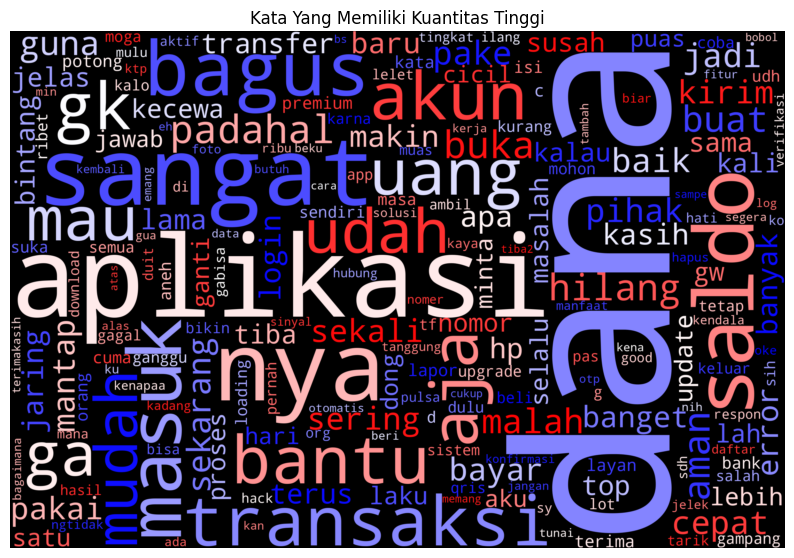

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


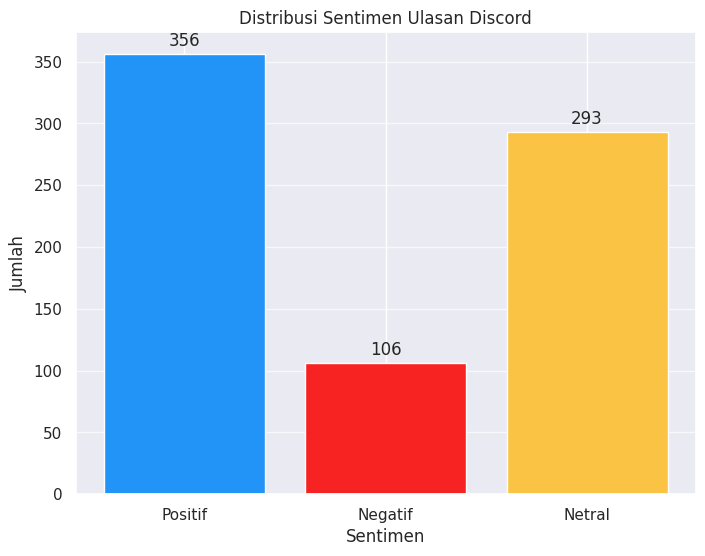

In [43]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")


In [44]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,mantap cepat tepat,"fontcolor="" # FFFF00""s great fontcolor="" # FFF...",Positif
1,bagus banget,Very good.,Positif
3,bagus sekali,Very good.,Positif
4,baik,Okay.,Positif
5,good,good,Positif
...,...,...,...
745,cukup baik,Pretty good.,Positif
748,bulan udah 3 top up dana lewat m bangking tran...,The month has been three top-up funds through ...,Positif
750,sangat bantu sekali,That's very helpful.,Positif
752,halooo dana akun transaksi sendiri tahu uang s...,Hello. The transaction funds themselves know t...,Negatif


In [45]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,mantap cepat tepat,"fontcolor="" # FFFF00""s great fontcolor="" # FFF...",1
1,bagus banget,Very good.,1
3,bagus sekali,Very good.,1
4,baik,Okay.,1
5,good,good,1
...,...,...,...
745,cukup baik,Pretty good.,1
748,bulan udah 3 top up dana lewat m bangking tran...,The month has been three top-up funds through ...,1
750,sangat bantu sekali,That's very helpful.,1
752,halooo dana akun transaksi sendiri tahu uang s...,Hello. The transaction funds themselves know t...,0


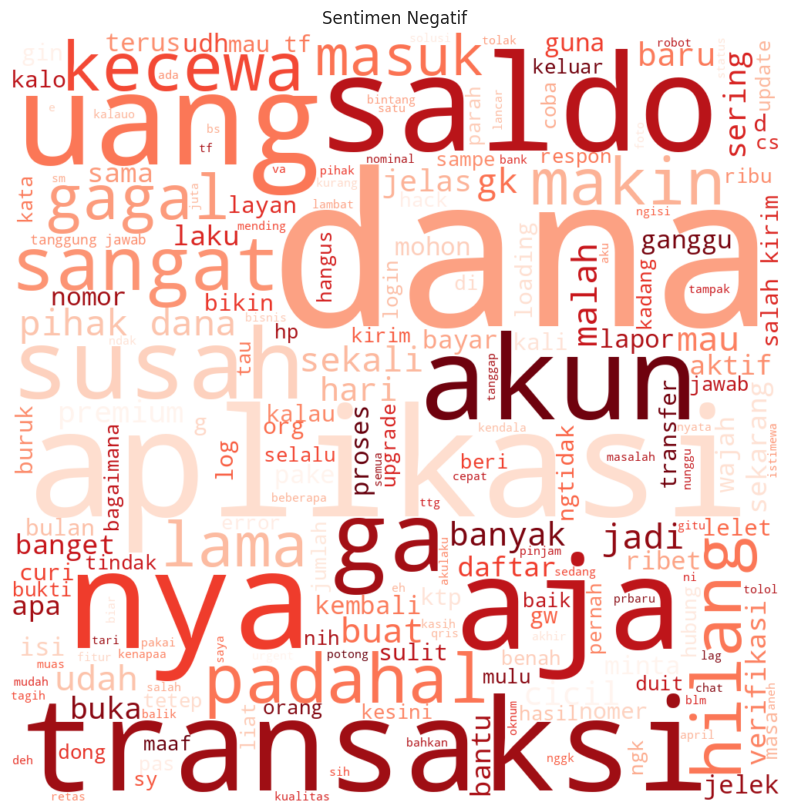

In [46]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

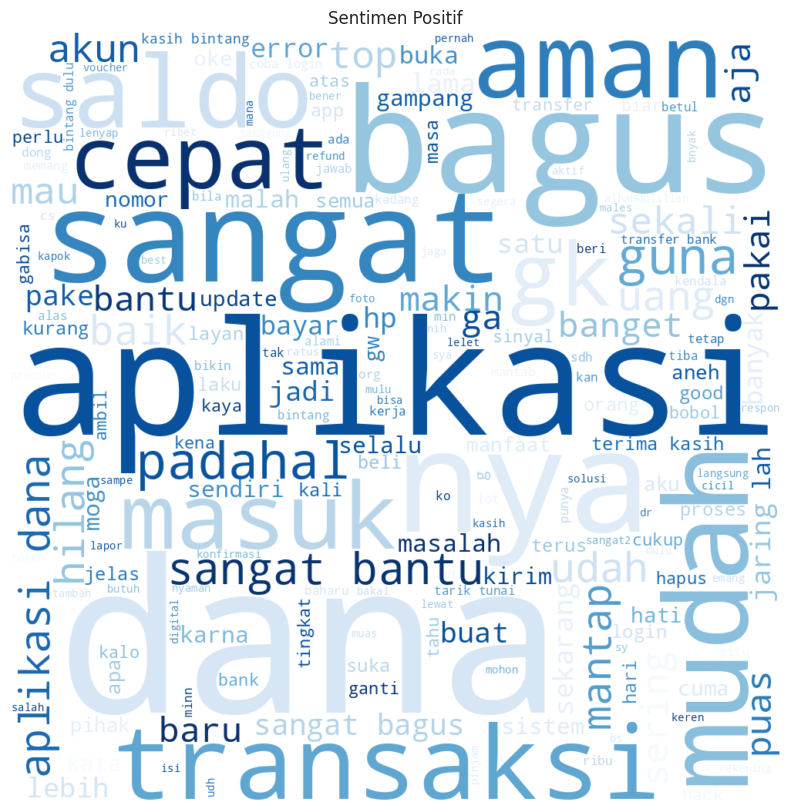

In [47]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [48]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    356
0    106
Name: count, dtype: int64

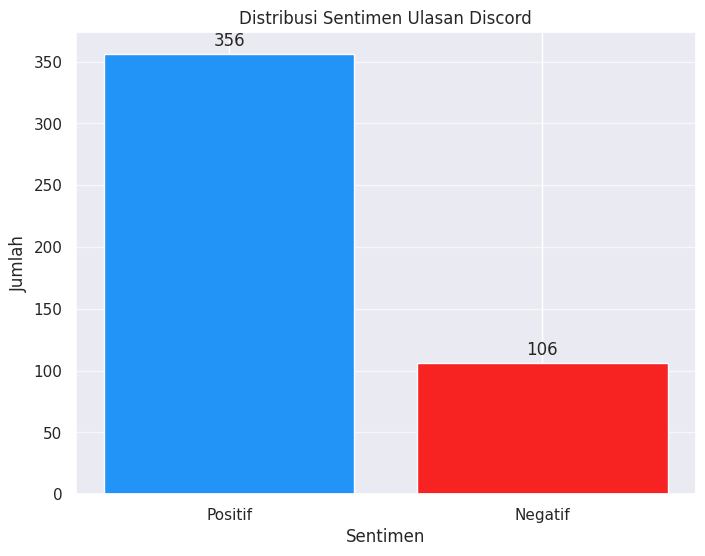

In [49]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")

# **Data Preparation**

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [53]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

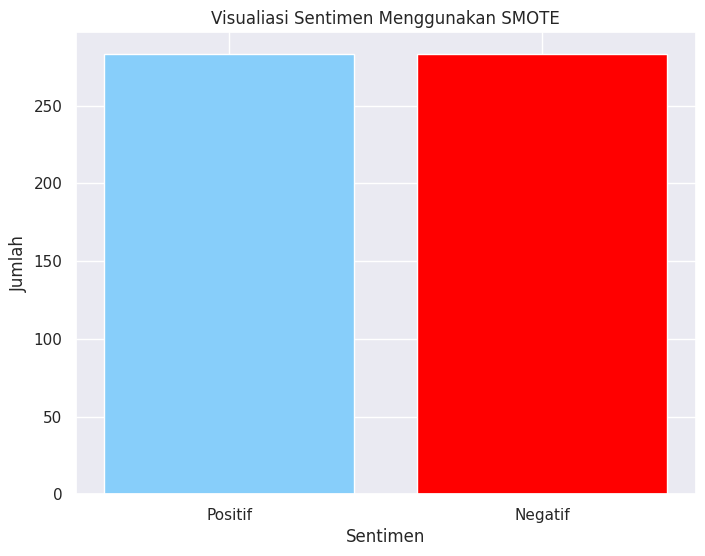

In [54]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [55]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [56]:
y_pred = naive_bayes.predict(X_test_vec)

In [57]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8387096774193549

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.62      0.65      0.63        20
     Positif       0.90      0.89      0.90        73

    accuracy                           0.84        93
   macro avg       0.76      0.77      0.77        93
weighted avg       0.84      0.84      0.84        93



# **Testing**


In [58]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : uang saya hilang entah kemana tidak ada tanggung jawab aplikasi ini
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [59]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : aplikasi ini sangat membantu untuk menyimpan uang digital dan sangat cepat dan tepat
Hasil Analisis Sentimen Untuk Teks Baru : Positif
